# Sales analysis
Let's try to Analyse this data set
All credits go to  Keith Galli who created this data set : https://www.youtube.com/watch?v=eMOA1pPVUc4

First import our librairies :

In [9]:
import pandas as pd
from pathlib import Path


### 1. Merge files in a folder

In [6]:
# Read csv

df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [8]:
# Merge 2 csv with map : 
df = pd.concat(
    map(pd.read_csv, ['./Sales_Data/Sales_April_2019.csv', './Sales_Data/Sales_August_2019.csv']), ignore_index=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
30389,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
30390,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
30391,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
30392,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [54]:
# Merge a whole folder :
dir = Path("./Sales_Data/")

df = (pd.read_csv(f) for f in dir.glob("*.csv"))
df = pd.concat(df)

In [55]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### 2. Data Cleaning

Delete the NaN rows

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [57]:
# Count the NaN rows
df.isnull().sum().sort_values(ascending=False).head(20)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [58]:
df.dropna(axis=0, inplace=True)
df.isnull().sum().sort_values(ascending=False).head(20)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [59]:
df.head(20)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [60]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [61]:
# Get rid of the 350 lines of "quantity ordered"
df2 = df[df['Quantity Ordered'] != "Quantity Ordered"] 
df2


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [63]:
df = df2
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [68]:
# convertir les colonnes dans les bons data types
convert_dict = {'Quantity Ordered': int,
                'Price Each': float }  
df = df.astype(convert_dict)  
print(df.dtypes)

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


Check whether the Price Each Column doesn't contain text values

In [65]:
print(df['Price Each'].value_counts())

11.95     21903
14.95     21658
2.99      20641
3.84      20577
11.99     18882
150       15450
99.99     13325
149.99     7507
700        6804
389.99     6230
379.99     6181
600        5490
300        4780
1700       4702
999.99     4128
109.99     4101
400        2056
600.0      1347
150.0        99
700.0        38
1700.0       22
300.0        20
400.0         9
Name: Price Each, dtype: int64


Check whether the Quantity Ordered column only has INT values

In [66]:
print(df['Quantity Ordered'].value_counts())

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64


Add a new column multiplied :

In [70]:
df["Total CA"] = df["Quantity Ordered"] * df["Price Each"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [73]:
print(df['Product'].value_counts())

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64


Display only the USB C Charging lines

In [76]:
df[df.Product == 'USB-C Charging Cable']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",11.95
17,176573,USB-C Charging Cable,1,11.95,04/27/19 18:41,"214 Chestnut St, San Francisco, CA 94016",11.95
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95
...,...,...,...,...,...,...,...
11666,259339,USB-C Charging Cable,2,11.95,09/12/19 23:43,"509 Park St, Austin, TX 73301",23.90
11670,259343,USB-C Charging Cable,1,11.95,09/14/19 19:30,"675 Maple St, Austin, TX 73301",11.95
11678,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",11.95
11680,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",11.95


Add Month columns :

Add a Month column usign a slicing method :

In [80]:
# add month column
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32") #convertion en INT au passage
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9


## EDA
Exploratory Data Analysis
### 1. What was the best month for sales ? How much was earned that month ?

(Bad) idea # 1 : Use a sort.value
We then get the best month, but with no group / sum

In [83]:
df2 = df.sort_values(["Total CA"] , ascending=False)
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month
6776,200528,Macbook Pro Laptop,2,1700.00,05/13/19 13:40,"643 4th St, Boston, MA 02215",3400.00,5
385,210292,Macbook Pro Laptop,2,1700.00,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",3400.00,6
4717,181069,Macbook Pro Laptop,2,1700.00,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",3400.00,4
5219,181544,Macbook Pro Laptop,2,1700.00,04/22/19 12:48,"731 11th St, New York City, NY 10001",3400.00,4
20213,278637,ThinkPad Laptop,2,999.99,10/02/19 16:06,"643 Cedar St, Boston, MA 02215",1999.98,10
...,...,...,...,...,...,...,...,...
6613,265671,AAA Batteries (4-pack),1,2.99,10/15/19 21:15,"166 Meadow St, Atlanta, GA 30301",2.99,10
6173,156382,AAA Batteries (4-pack),1,2.99,02/21/19 20:00,"944 Jackson St, Los Angeles, CA 90001",2.99,2
6176,156385,AAA Batteries (4-pack),1,2.99,02/02/19 22:33,"961 6th St, Los Angeles, CA 90001",2.99,2
6178,156387,AAA Batteries (4-pack),1,2.99,02/16/19 16:17,"950 Pine St, Dallas, TX 75001",2.99,2


(Good) idea #2 : Use a GROUP BY et un SUM

In [124]:
df_sales_month = df.groupby("Month").sum()
print(df_sales_month)
df_sales_month_sorted = df.groupby("Month").sum().sort_values("Total CA" , ascending=False)
print(df_sales_month_sorted)

       Quantity Ordered  Price Each    Total CA
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34
       Quantity Ordered  Price Each    Total CA
Month                                          
12                28114  4588415.41  4613443.34
10                22703  3715554.83  3736726.88
4                 20558  3367671.02  3390670.24
11                19798  3180600.68  3199603.20
5                 18667  3135125.13  315

Plot the data

In [88]:
import matplotlib.pyplot as plt


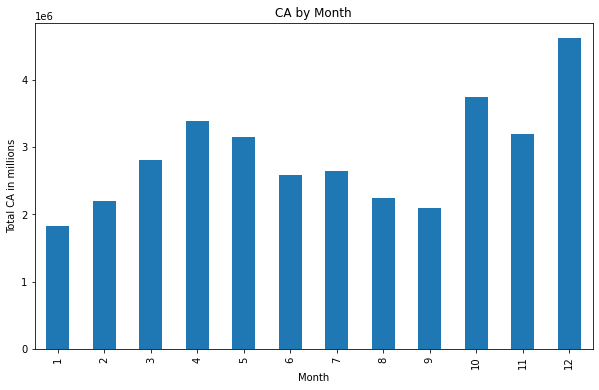

In [121]:
df_sales_month["Total CA"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Month') # add to x-label to the plot
plt.ylabel('Total CA in millions') # add y-label to the plot
plt.title('CA by Month') # add title to the plot

plt.show()

Plot the data sorted :

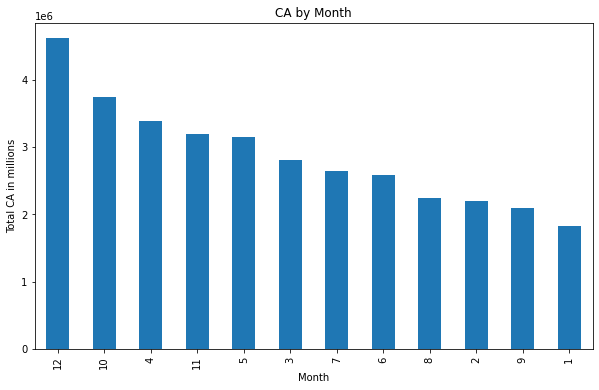

In [126]:
df_sales_month_sorted["Total CA"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Month') # add to x-label to the plot
plt.ylabel('Total CA in millions') # add y-label to the plot
plt.title('CA by Month') # add title to the plot

plt.show()

### 2.  What city had the hightest number of sales ?

Add a State code Column (the last 8 characters of the string)

In [132]:
df["State Code"] = df["Purchase Address"].str[-8:]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,City,State Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,TX 75001,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,MA 02215,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,CA 90001,CA 90001
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,CA 90001,CA 90001
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,CA 94016,CA 94016
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,CA 94016,CA 94016
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,CA 94016,CA 94016


In [136]:
# Accidentaly create the wrong column, so deleted it.
# Always create a temporary DF when messing around with drop functions
df = df.drop(["City"], axis=1)
df

KeyError: "['City'] not found in axis"

In [137]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,State Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,CA 90001
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,CA 90001
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,CA 94016
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,CA 94016
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,CA 94016


Other technique : Add city column who split the Purchase Address between the ","
We use "lambda x" everytime we need to work with the content of a cell

In [139]:
# Lambda x = for each of the cell content. Then plit using the ",", then take the second value (the first value is before the first "," )
df["City"] = df["Purchase Address"].apply(lambda x:x.split(',')[1]) 


To go further we can define a function "get_city" and call it from the Apply method : 

In [ ]:
def get_city(address):
       return address.split(",")[1] 

df["City"] = df["Purchase Address"].apply(lambda x:get_city(x))



In [140]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,State Code,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,TX 75001,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,MA 02215,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,CA 90001,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,CA 94016,San Francisco


We can then GROUP BY our data  :

In [143]:
df_city_sales = df.groupby("City").sum()
print(df_city_sales)
df_city_sales_sorted = df.groupby("City").sum().sort_values("Total CA" , ascending=False)
print(df_city_sales_sorted)
df_city_sales_sorted = df.groupby("City").sum().sort_values("Quantity Ordered" , ascending=False)
print(df_city_sales_sorted)

                Quantity Ordered  Price Each    Total CA   Month
City                                                            
 Atlanta                   16602  2779908.20  2795498.58  104794
 Austin                    11153  1809873.61  1819581.75   69829
 Boston                    22528  3637409.77  3661642.01  141112
 Dallas                    16730  2752627.82  2767975.40  104620
 Los Angeles               33289  5421435.23  5452570.80  208325
 New York City             27932  4635370.83  4664317.43  175741
 Portland                  14053  2307747.47  2320490.61   87765
 San Francisco             50239  8211461.74  8262203.91  315520
 Seattle                   16553  2733296.01  2747755.48  104941
                Quantity Ordered  Price Each    Total CA   Month
City                                                            
 San Francisco             50239  8211461.74  8262203.91  315520
 Los Angeles               33289  5421435.23  5452570.80  208325
 New York City           

Then we can plot it : 

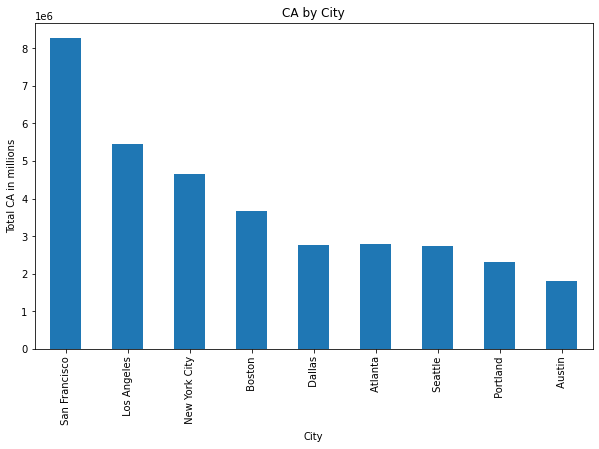

In [144]:
df_city_sales_sorted["Total CA"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('Total CA in millions') # add y-label to the plot
plt.title('CA by City') # add title to the plot

plt.show()

### 3. At what time should we display advertisements ti maximize customer's buying product ?

Let's extract the clock from the Order Date column

We're trying the function method, this time we split the column using the " " : 

In [151]:
def get_time(time):
       return time.split(" ")[1] 



df["Time"] = df["Order Date"].apply(lambda x:get_time(x))




Add a column "Hour" to group the data by hour :

In [153]:
df['Hour'] = df["Time"].str[:2]


df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,State Code,City,Time,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,TX 75001,Dallas,08:46,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,MA 02215,Boston,22:30,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles,14:38,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,14:38,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,09:27,09
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,CA 90001,Los Angeles,20:56,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco,16:00,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco,07:39,07
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,CA 94016,San Francisco,17:30,17


Convert the Hour into INT

In [157]:
df['Hour'].astype(int) # Ok but it doesn't stay in the DF that way

0         8
2        22
3        14
4        14
5         9
         ..
11681    20
11682    16
11683     7
11684    17
11685     0
Name: Hour, Length: 185950, dtype: int32

Create a dictionnary to store the column to convert :
(A bit overkill, cause we just want to convert 1 column)

In [161]:
convert_hour = {'Hour': int}  
df = df.astype(convert_hour)  
print(df.dtypes)

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Total CA            float64
Month                 int32
State Code           object
City                 object
Time                 object
Hour                  int32
dtype: object


In [162]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,State Code,City,Time,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,TX 75001,Dallas,08:46,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,MA 02215,Boston,22:30,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles,14:38,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,14:38,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,09:27,9
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,CA 90001,Los Angeles,20:56,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco,16:00,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco,07:39,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,CA 94016,San Francisco,17:30,17


Apply Group By Hour

In [164]:
df_hour_sales = df.groupby("Hour").sum().sort_values("Hour" , ascending=True)
print(df_hour_sales)
df_hour_sales_sorted = df.groupby("Hour").sum().sort_values("Total CA" , ascending=False)
print(df_hour_sales_sorted)


      Quantity Ordered  Price Each    Total CA  Month
Hour                                                 
0                 4428   709296.70   713721.27  27554
1                 2619   458490.00   460866.88  16657
2                 1398   233833.64   234851.44   8507
3                  928   144726.42   145757.89   5904
4                  937   162058.18   162661.01   6148
5                 1493   229621.21   230679.82   9301
6                 2810   445000.11   448113.00  17539
7                 4556   740568.11   744854.12  28850
8                 7002  1185970.62  1192348.97  43626
9                 9816  1628498.49  1639030.58  60981
10               12308  1932665.62  1944286.77  76928
11               14005  2288855.18  2300610.24  87654
12               14202  2299876.68  2316821.34  89161
13               13685  2139743.86  2155389.80  85808
14               12362  2072194.77  2083672.73  77836
15               11391  1931174.99  1941549.60  72060
16               11662  1892

Then Plot

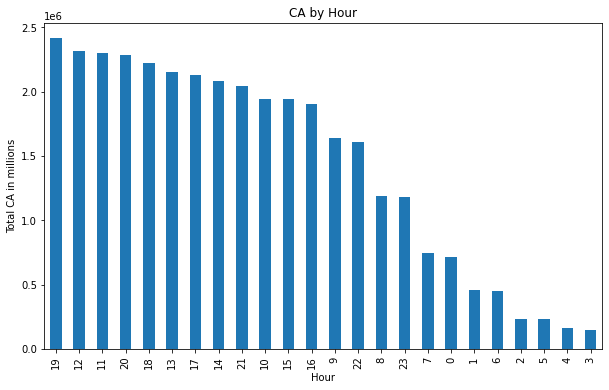

In [165]:
df_hour_sales_sorted["Total CA"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Hour') # add to x-label to the plot
plt.ylabel('Total CA in millions') # add y-label to the plot
plt.title('CA by Hour') # add title to the plot

plt.show()

Alternative way : convert the colonne to a date format, then call dates methods easily : 

In [166]:
df["Order Date bis"] = pd.to_datetime(df["Order Date"])

In [169]:
df["Hour bis"] = df["Order Date bis"].dt.hour
df["Min bis"] = df["Order Date bis"].dt.minute
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,State Code,City,Time,Hour,Order Date bis,Hour bis,Min bis
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,TX 75001,Dallas,08:46,8,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,MA 02215,Boston,22:30,22,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles,14:38,14,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,14:38,14,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,09:27,9,2019-04-30 09:27:00,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,CA 90001,Los Angeles,20:56,20,2019-09-17 20:56:00,20,56
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco,16:00,16,2019-09-01 16:00:00,16,0
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco,07:39,7,2019-09-23 07:39:00,7,39
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,CA 94016,San Francisco,17:30,17,2019-09-19 17:30:00,17,30


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   Total CA          185950 non-null  float64       
 7   Month             185950 non-null  int32         
 8   State Code        185950 non-null  object        
 9   City              185950 non-null  object        
 10  Time              185950 non-null  object        
 11  Hour              185950 non-null  int32         
 12  Order Date bis    185950 non-null  datetime64[ns]
 13  Hour bis          185950 non-null  int64         
 14  Min b

In [233]:
df2 = df[["Hour bis","Total CA"]]

df2

,Hour bis,Total CA
0,8,23.90
2,22,99.99
3,14,600.00
4,14,11.99
5,9,11.99
...,...,...
11681,20,8.97
11682,16,700.00
11683,7,700.00
11684,17,379.99


In [234]:
df2_hour_sales = df2.groupby("Hour bis").sum().sort_values("Total CA" , ascending=False)
print(df2_hour_sales)


            Total CA
Hour bis            
19        2412938.54
12        2316821.34
11        2300610.24
20        2281716.24
18        2219348.30
13        2155389.80
17        2129361.61
14        2083672.73
21        2042000.86
10        1944286.77
15        1941549.60
16        1904601.31
9         1639030.58
22        1607549.21
8         1192348.97
23        1179304.44
7          744854.12
0          713721.27
1          460866.88
6          448113.00
2          234851.44
5          230679.82
4          162661.01
3          145757.89


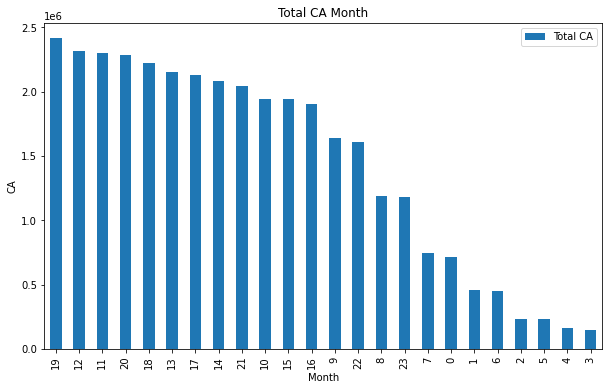

In [215]:
df2_hour_sales.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Month') # add to x-label to the plot
plt.ylabel('CA') # add y-label to the plot
plt.title('Total CA Month') # add title to the plot

plt.show()

In [244]:
df3 = df2_hour_sales.reset_index() #remettre l'index (au cas où ça ferait bug le chart ?)

In [247]:
df3

,Hour bis,Total CA
0,19,2412938.54
1,12,2316821.34
2,11,2300610.24
3,20,2281716.24
4,18,2219348.30
5,13,2155389.80
6,17,2129361.61
7,14,2083672.73
8,21,2042000.86
9,10,1944286.77


Scatter chart :

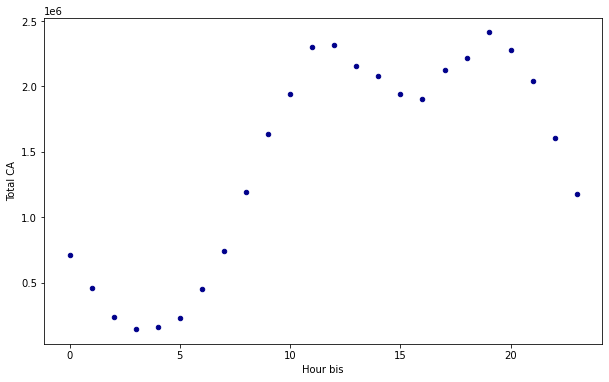

In [250]:
df3.plot(kind='scatter',  y='Total CA',x="Hour bis", figsize=(10, 6), color='darkblue')
plt.show()

### 4. What product are most often sold together ?

Test 1 : Group by Order Date and Order ID (Normally there is never 2 orders at the exact same second, but let's be clean here ) : 

In [253]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,State Code,City,Time,Hour,Order Date bis,Hour bis,Min bis
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,TX 75001,Dallas,08:46,8,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,MA 02215,Boston,22:30,22,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles,14:38,14,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,14:38,14,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,09:27,9,2019-04-30 09:27:00,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,CA 90001,Los Angeles,20:56,20,2019-09-17 20:56:00,20,56
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco,16:00,16,2019-09-01 16:00:00,16,0
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,CA 94016,San Francisco,07:39,7,2019-09-23 07:39:00,7,39
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,CA 94016,San Francisco,17:30,17,2019-09-19 17:30:00,17,30


The Order ID Column seems composed of unique values :

In [258]:
df_OrderID_OrderDate = df.groupby(["Order ID", "Order Date"]).sum()
df_OrderID_OrderDate.head(20)

,,Quantity Ordered,Price Each,Total CA,Month,Hour,Hour bis,Min bis
Order ID,Order Date,,,,,,,
141234,01/22/19 21:25,1,700.00,700.00,1,21,21,25
141235,01/28/19 14:15,1,14.95,14.95,1,14,14,15
141236,01/17/19 13:33,2,11.99,23.98,1,13,13,33
141237,01/05/19 20:33,1,149.99,149.99,1,20,20,33
141238,01/25/19 11:59,1,11.99,11.99,1,11,11,59
141239,01/29/19 20:22,1,2.99,2.99,1,20,20,22
141240,01/26/19 12:16,1,389.99,389.99,1,12,12,16
141241,01/05/19 12:04,1,11.95,11.95,1,12,12,4
141242,01/01/19 10:30,1,99.99,99.99,1,10,10,30


Let's check whether the order ID is composed of unique values ?

In [259]:
print(df.nunique())

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Total CA                54
Month                   12
State Code              10
City                     9
Time                  1440
Hour                    24
Order Date bis      142395
Hour bis                24
Min bis                 60
dtype: int64


Order ID has 178437 unique values, on a total of 185950 values

In [268]:
print(df['Order ID'].value_counts())


160873    5
178158    4
277875    4
196615    4
304802    4
         ..
158177    1
158178    1
158179    1
158180    1
259357    1
Name: Order ID, Length: 178437, dtype: int64


let's just group by Order ID. 
We are in a cul-de-sac here, let's try something else :

In [277]:
df_OrderID_OrderDate = df.groupby(["Order ID"]).sum().sort_values(["Total CA"] , ascending=False)
df_OrderID_OrderDate.head(20)

,Quantity Ordered,Price Each,Total CA,Month,Hour,Hour bis,Min bis
Order ID,,,,,,,
181069,3,2079.99,3779.99,8,42,42,2
243728,2,3400.00,3400.00,16,24,24,114
202212,2,3400.00,3400.00,10,26,26,38
181544,2,1700.00,3400.00,4,12,12,48
200528,2,1700.00,3400.00,5,13,13,40
255318,2,3400.00,3400.00,18,22,22,116
210292,2,1700.00,3400.00,6,9,9,0
188087,2,2699.99,2699.99,8,42,42,6
307153,2,2699.99,2699.99,24,20,20,62


Step 1 : keep only the duplicated Values

In [279]:
df_duplicate = df[df["Order ID"].duplicated(keep=False)    ] # Double [[]] to keep the result as a DF. "Keep = false" to keep all duplicant
df_duplicate

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,State Code,City,Time,Hour,Order Date bis,Hour bis,Min bis
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles,14:38,14,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,14:38,14,2019-04-12 14:38:00,14,38
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles,19:42,19,2019-04-03 19:42:00,19,42
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,4,CA 90001,Los Angeles,19:42,19,2019-04-03 19:42:00,19,42
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,4,MA 02215,Boston,11:31,11,2019-04-07 11:31:00,11,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",3.84,9,GA 30301,Atlanta,20:18,20,2019-09-20 20:18:00,20,18
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,9,GA 30301,Atlanta,00:25,0,2019-09-16 00:25:00,0,25
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",5.98,9,GA 30301,Atlanta,00:25,0,2019-09-16 00:25:00,0,25
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",600.00,9,CA 94016,San Francisco,13:49,13,2019-09-30 13:49:00,13,49


Step 2 : Create a new column to store all the duplicated Order product

In [280]:
df_duplicate["Group"] = df_duplicate.groupby("Order ID")["Product"].transform(lambda x:",".join (x))
df_duplicate

C:\Users\Chris\AppData\Local\Temp/ipykernel_15172/2745481616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicate["Group"] = df_duplicate.groupby("Order ID")["Product"].transform(lambda x:",".join (x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total CA,Month,State Code,City,Time,Hour,Order Date bis,Hour bis,Min bis,Group
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles,14:38,14,2019-04-12 14:38:00,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,CA 90001,Los Angeles,14:38,14,2019-04-12 14:38:00,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,4,CA 90001,Los Angeles,19:42,19,2019-04-03 19:42:00,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,4,CA 90001,Los Angeles,19:42,19,2019-04-03 19:42:00,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,4,MA 02215,Boston,11:31,11,2019-04-07 11:31:00,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",3.84,9,GA 30301,Atlanta,20:18,20,2019-09-20 20:18:00,20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,9,GA 30301,Atlanta,00:25,0,2019-09-16 00:25:00,0,25,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",5.98,9,GA 30301,Atlanta,00:25,0,2019-09-16 00:25:00,0,25,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",600.00,9,CA 94016,San Francisco,13:49,13,2019-09-30 13:49:00,13,49,"Google Phone,USB-C Charging Cable"


Drop the duplicated Row :

In [282]:
df_duplicate = df_duplicate[["Order ID","Group"]].drop_duplicates()
df_duplicate.head(20)

,Order ID,Group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


Now we can find the most sold together products : 
But this method doesn't count in a same groupe : (object 1, object 2) and (object 2, object 1)

In [283]:
print(df_duplicate['Group'].value_counts())

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: Group, Length: 366, dtype: int64


Alternative method :

In [285]:
from itertools import combinations
from collections import Counter

In [288]:
count = Counter()

for row in df_duplicate['Group']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2))) #2 for a pair
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [289]:
count = Counter()

for row in df_duplicate['Group']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,3))) #3 pour un trio d'objets
    
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

### 5. What product sold the most ?

In [302]:
df_group_product = df.groupby(["Product"]).sum().sort_values(["Quantity Ordered"], ascending=False)
df_group_product


,Quantity Ordered,Price Each,Total CA,Month,Hour,Hour bis,Min bis
Product,,,,,,,
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332,297332,612113
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342,298342,609039
USB-C Charging Cable,23975,261740.85,286501.25,154819,314645,314645,647586
Lightning Charging Cable,23217,323787.10,347094.15,153092,312529,312529,634442
Wired Headphones,20557,226395.18,246478.43,133397,271720,271720,554023
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445,192445,392603
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540,107540,219948
iPhone,6849,4789400.00,4794300.00,47941,98657,98657,201688


Let's Plot this :

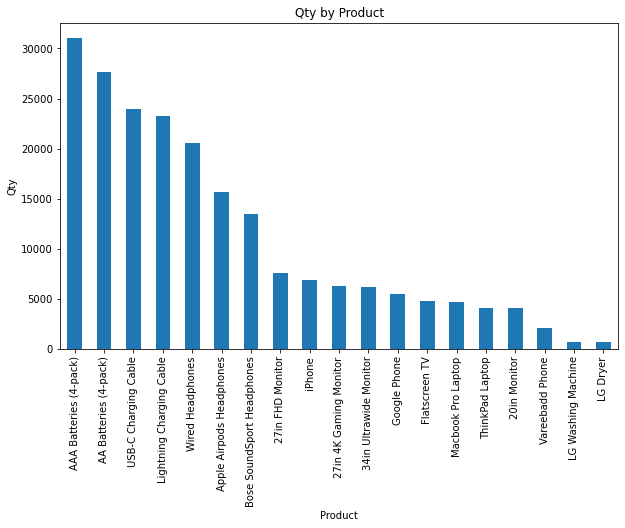

In [309]:

df_group_product["Quantity Ordered"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Product') # add to x-label to the plot
plt.ylabel('Qty') # add y-label to the plot
plt.title('Qty by Product') # add title to the plot

plt.show()
